https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = boston_dataset.target

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\Ing-Figueroa\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


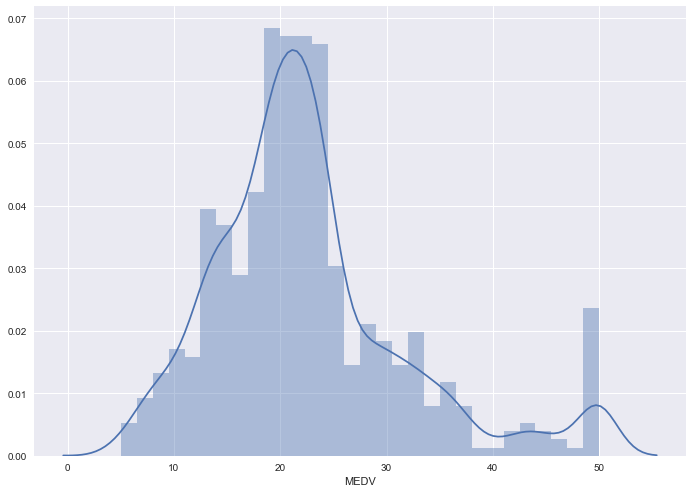

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

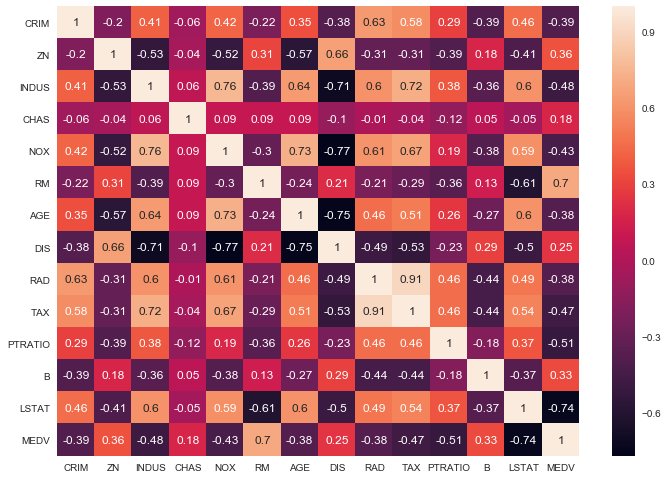

In [9]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

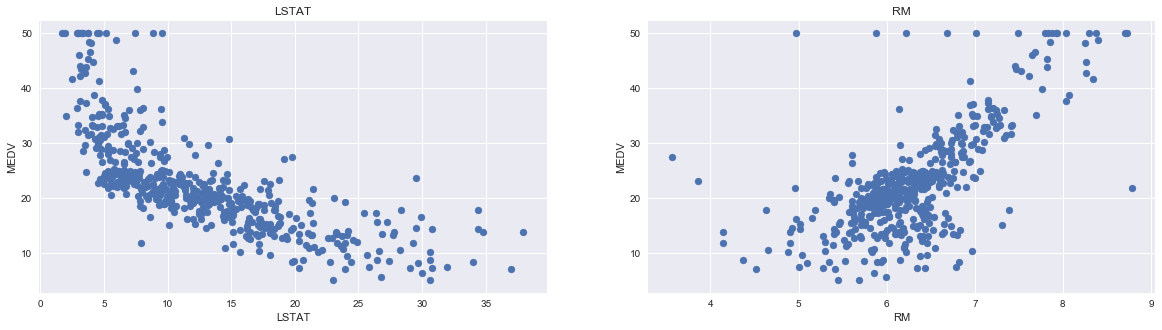

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
print('intercept:', lin_model.intercept_)
print('slope:', lin_model.coef_)

intercept: 2.73624034260661
slope: [-0.71722954  4.58938833]


In [15]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


### Ridge

In [16]:
ridge = Ridge().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, Y_test)))

Training set score: 0.63
Test set score: 0.66


In [17]:
ridge10 = Ridge(alpha=15).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, Y_test)))

Training set score: 0.63
Test set score: 0.65


In [18]:
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, Y_test)))

Training set score: 0.63
Test set score: 0.66


### Lasso

In [19]:
lasso00001 = Lasso(alpha=0.1, max_iter=10).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, Y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.63
Test set score: 0.66
Number of features used: 2


### Create quadratic and cubic features

In [20]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)

In [21]:
lm_cuad = lin_model.fit(X_quad, Y_train)
y_quad_fit = lm_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(Y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)

0.8170372495892189


In [22]:
lm_cubic = lin_model.fit(X_cubic, Y_train)
y_cubic_fit = lm_cubic.predict(cubic.fit_transform(X_test))
cubic_r2 = r2_score(Y_test, y_cubic_fit) #lm.predict(X_quad))
print(cubic_r2)

0.8087884936139451


### Interaction terms

In [23]:
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_train)
X_test_inter = interaction.fit_transform(X_test)

In [24]:
# Fit the linear regression
model_train = lin_model.fit(X_inter, Y_train)
model_test = lin_model.fit(X_test_inter, Y_test)

In [25]:
# model evaluation for training set
y_train_predict = model_train.predict(X_inter)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model_test.predict(X_test_inter)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.201925401346341
R2 score is 0.6849884385550031


The model performance for testing set
--------------------------------------
RMSE is 3.645926136087213
R2 score is 0.8302194334016065


In [26]:
X_train.head()

,LSTAT,RM
33,18.35,5.701
283,3.16,7.923
418,20.62,5.957
502,9.08,6.120
402,20.31,6.404


### USING ALL THE FEATURES

In [27]:
X = boston.loc[:, boston.columns != 'MEDV']
Y = boston['MEDV']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [29]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [30]:
print('intercept:', lin_model.intercept_)
print('slope:', lin_model.coef_)

intercept: 37.912487009750485
slope: [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


In [31]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303172
R2 score is 0.7334492147453117


### Ridge

In [32]:
ridge = Ridge().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, Y_test)))

Training set score: 0.74
Test set score: 0.72


In [33]:
ridge10 = Ridge(alpha=15).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, Y_test)))

Training set score: 0.73
Test set score: 0.70


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, Y_test)))

Training set score: 0.74
Test set score: 0.73


### Lasso

In [35]:
lasso00001 = Lasso(alpha=0.1, max_iter=10).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, Y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.73
Test set score: 0.71
Number of features used: 12


C:\Users\Ing-Figueroa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4764.0123939125915, tolerance: 3.4704285816831684
  positive)


### Create quadratic and cubic features

In [36]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)

In [37]:
lm_cuad = lin_model.fit(X_quad, Y_train)
y_quad_fit = lm_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(Y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)

0.8694943908729339


In [38]:
lm_cubic = lin_model.fit(X_cubic, Y_train)
y_cubic_fit = lm_cubic.predict(cubic.fit_transform(X_test))
cubic_r2 = r2_score(Y_test, y_cubic_fit) #lm.predict(X_quad))
print(cubic_r2)

-2107.708845571212


### Interaction terms

In [39]:
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_train)
X_test_inter = interaction.fit_transform(X_test)

In [40]:
# Fit the linear regression
model_train = lin_model.fit(X_inter, Y_train)
model_test = lin_model.fit(X_test_inter, Y_test)

In [41]:
# model evaluation for training set
y_train_predict = model_train.predict(X_inter)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model_test.predict(X_test_inter)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 15.84265848321366
R2 score is -1.9218261678902033


The model performance for testing set
--------------------------------------
RMSE is 0.8630782700183999
R2 score is 0.9904857926616083
